In [1]:
from bayes_opt import BayesianOptimization
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

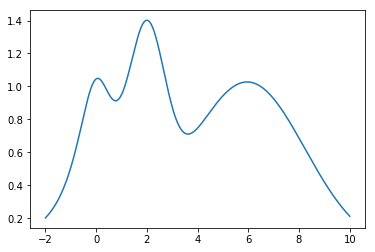

In [3]:
x = np.linspace(-2, 10, 10000).reshape(-1, 1)
y = target(x)

plt.plot(x, y)

In [4]:
#创建BayesianOptimization对象
bo = BayesianOptimization(target, {'x': (-2, 10)})

In [6]:
#设定相关参数与目标
#init_points，初始样本点的数目，随机选择
#n_iter 迭代次数，也就是采样重复次数
#acq 采集函数，这次试用的是ucb，上置信区间
#kappa值是权衡开发与探索的参数，这里设定为5的话，算法更加偏向于探索
bo.maximize(init_points=2, n_iter=0, acq='ucb', kappa=5)

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    1.35624 |    1.7666 | 
    2 | 00m00s |    0.27923 |    9.6259 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


In [7]:
#为了更方便查看贝叶斯优化的过程，这里先定义了两个可视化函数
def posterior(bo, x, xmin=-2, xmax=10):
    xmin, xmax = -2, 10
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma = bo.gp.predict(x, return_std=True)
    return mu, sigma

def plot_gp(bo, x, y):
    
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(bo.X)), fontdict={'size':30})
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    mu, sigma = posterior(bo, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(bo.X.flatten(), bo.Y, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility = bo.util.utility(x, bo.gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

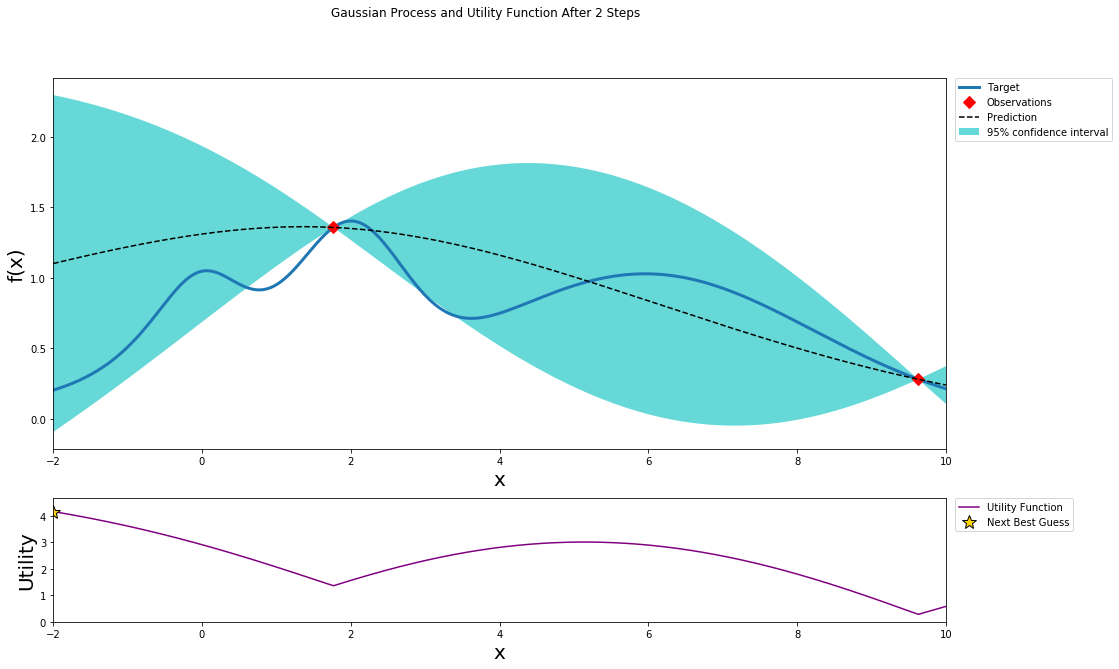

In [8]:
#画出初始化的两个样本点
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m01s |    0.20166 |   -2.0000 | 


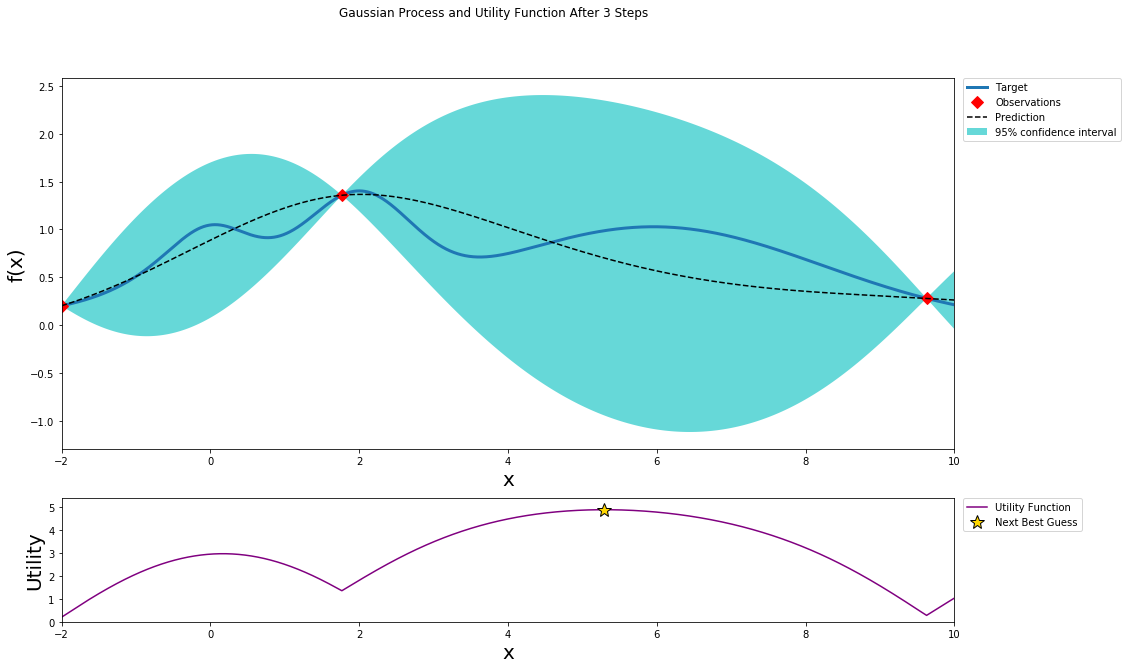

In [9]:
#一步高斯过程回归后，得到一个新的样本点
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    4 | 00m01s |    0.98598 |    5.2951 | 


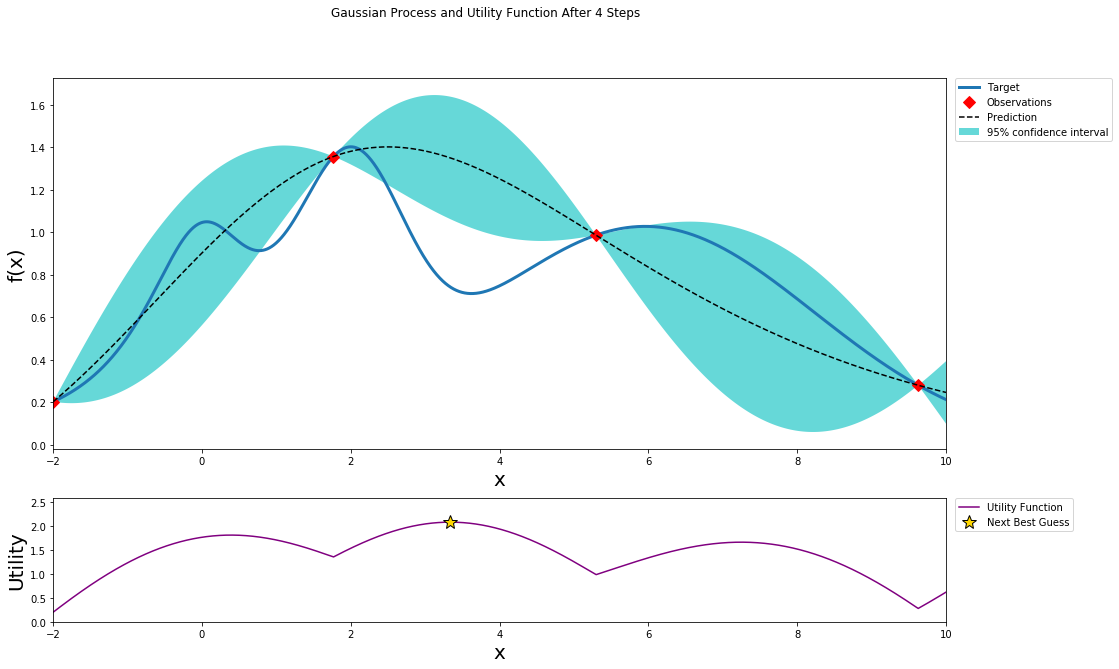

In [10]:
#再重复一次
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    5 | 00m01s |    0.74186 |    3.3369 | 


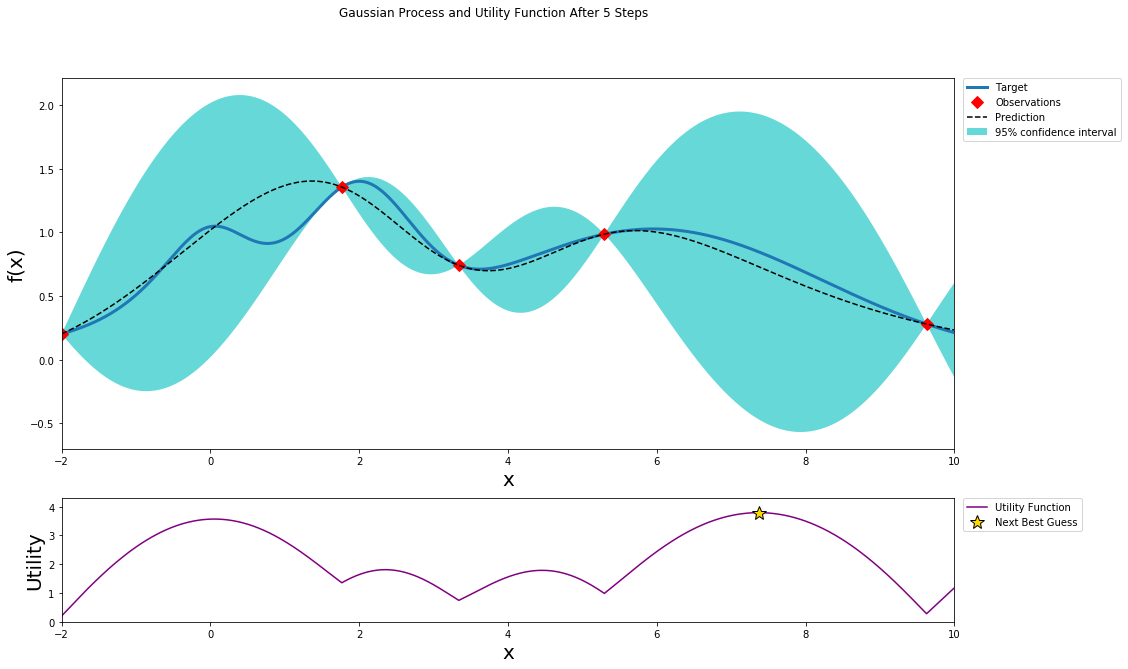

In [11]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    6 | 00m01s |    0.84712 |    7.3693 | 


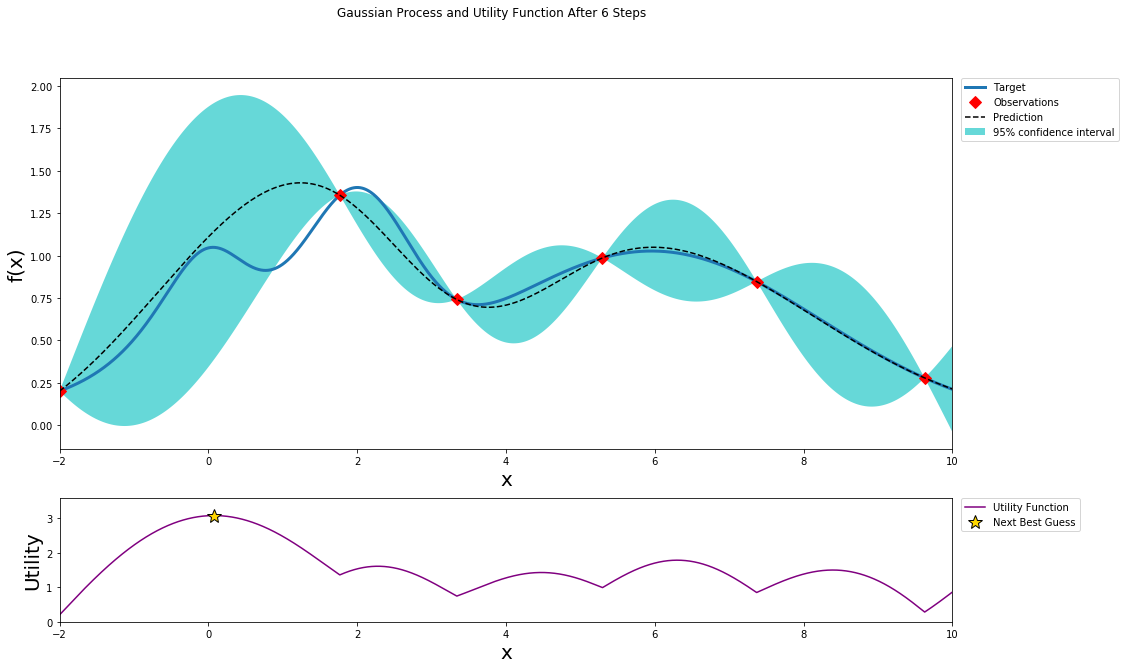

In [12]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    7 | 00m01s |    1.04885 |    0.0762 | 


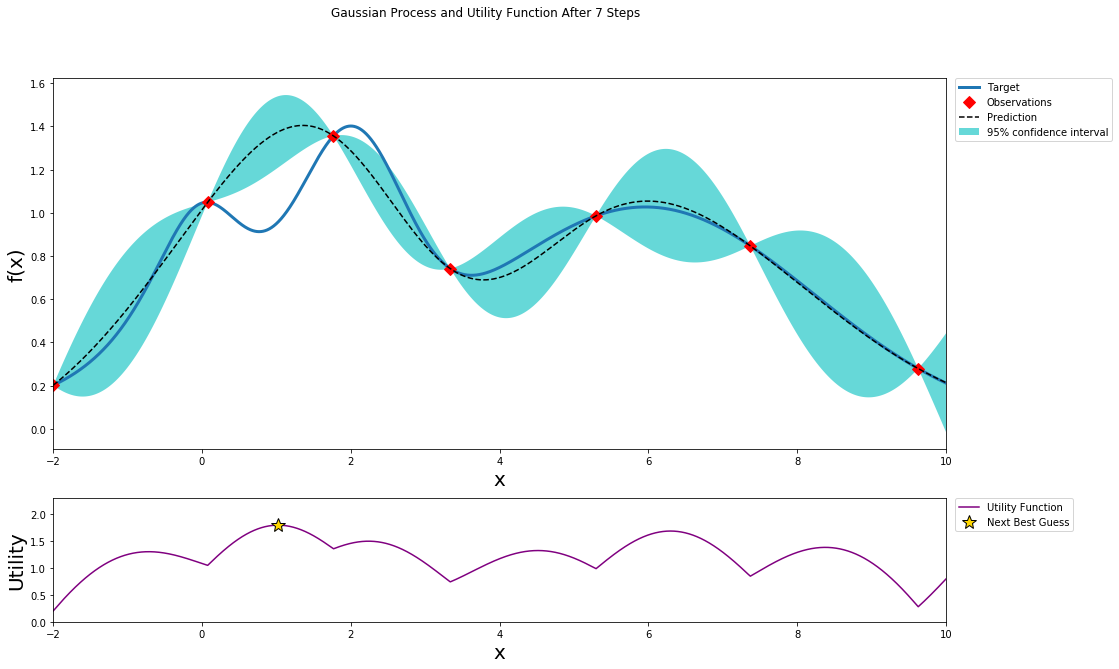

In [13]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    8 | 00m02s |    0.95742 |    1.0224 | 


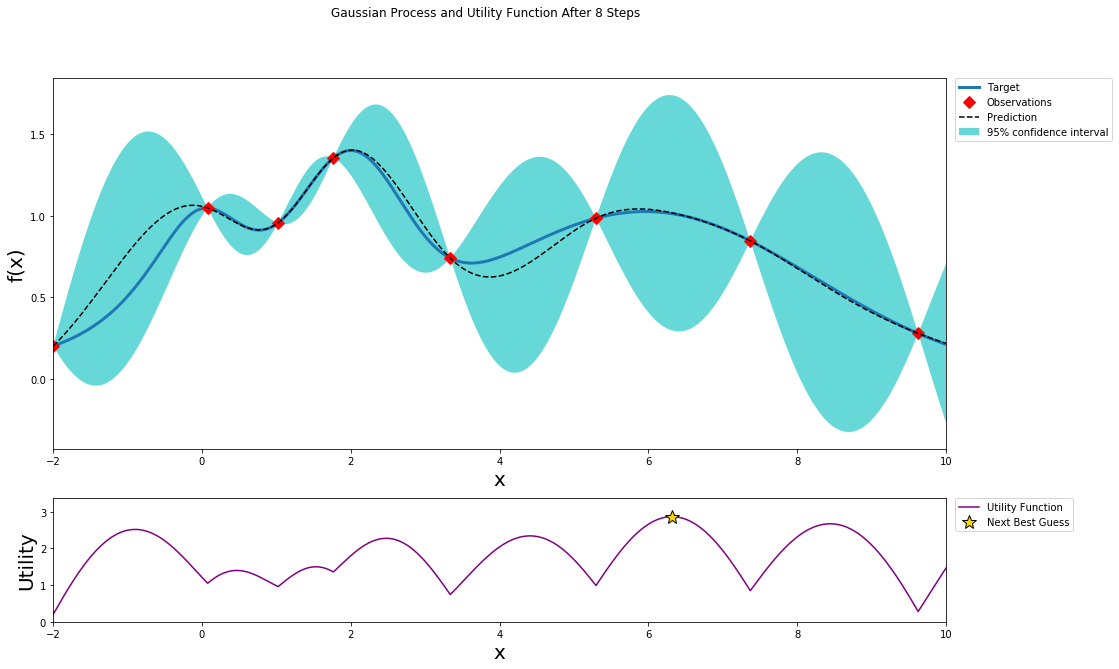

In [14]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    9 | 00m01s |    1.01445 |    6.3169 | 


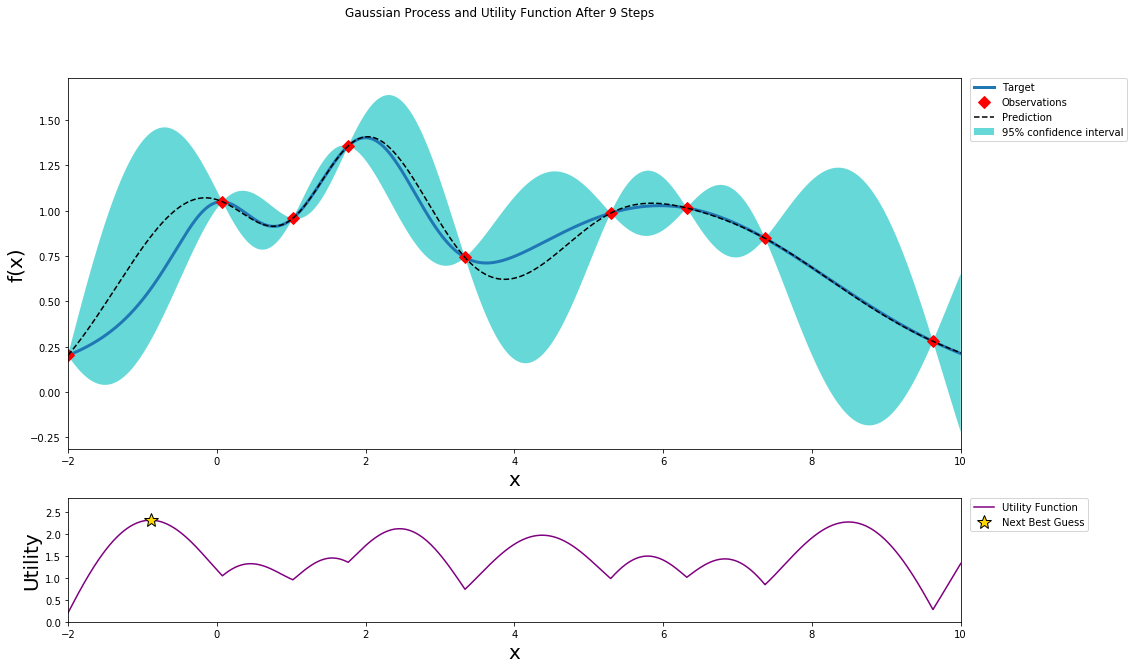

In [15]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   10 | 00m02s |    0.56741 |   -0.8891 | 
   11 | 00m01s |    0.55121 |    8.4915 | 
   12 | 00m01s |    1.24140 |    2.4526 | 
   13 | 00m01s |    0.83154 |    4.4243 | 
   14 | 00m02s |    1.39803 |    2.0676 | 
   15 | 00m04s |    1.39957 |    1.9490 | 


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


   16 | 00m04s |    1.40187 |    2.0059 | 


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -6.67396962e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 78, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00042143]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   17 | 00m07s |    1.40184 |    1.9927 | 


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-9.8266022]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 28, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00028337]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 76, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


   18 | 00m06s |    1.40190 |    2.0009 | 


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  2.36538035e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-9.23969604]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 43, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


   19 | 00m08s |    1.40077 |    1.9649 | 


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -9.53684939e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.0001679]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 63, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00016866]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 68, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)


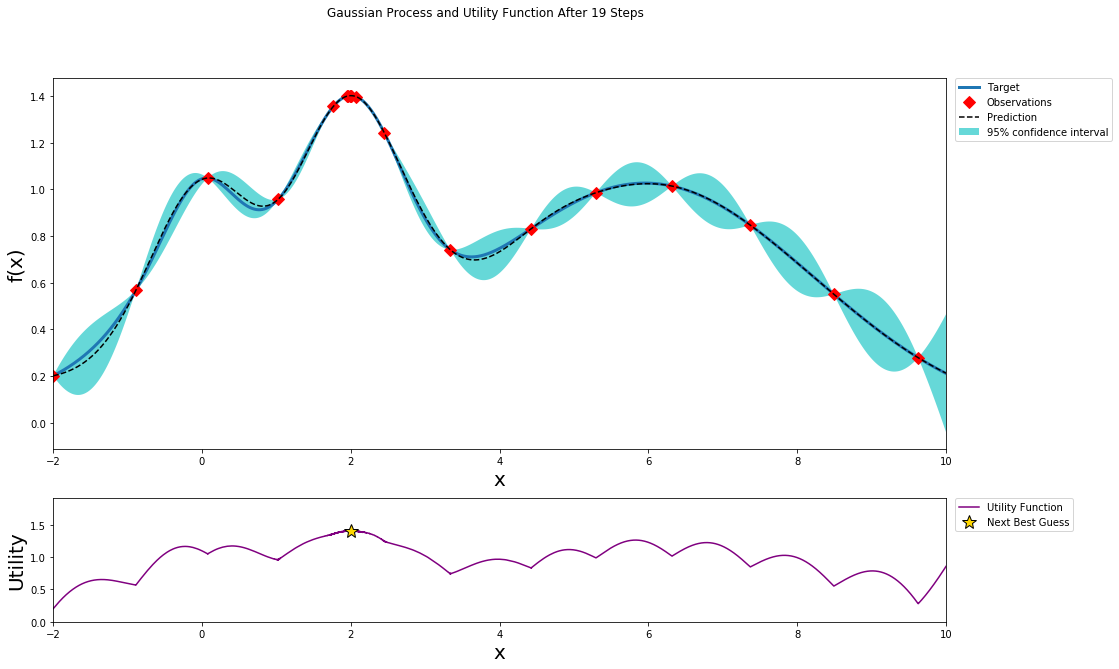

In [16]:
bo.maximize(init_points=0, n_iter=10, kappa=5)
plot_gp(bo, x, y)

In [17]:
print(bo.res['max'])

{'max_val': 1.4018971812192274, 'max_params': {'x': 2.0008653203273634}}
